SENDEX FORMULA = 2 X DEWPOINT + HUMIDITY - MINTEMP 

The Lower the number, the better the conditions. A Sendex of 100 is just about perfect as a general rule for rock climbing in the Red River Gorge.

In [2]:
import requests
from pprint import pprint as pp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
response = requests.get('https://api.open-meteo.com/v1/forecast?latitude=37.80&longitude=-83.70&hourly=temperature_2m,relativehumidity_2m,dewpoint_2m&daily=temperature_2m_min&current_weather=true&temperature_unit=fahrenheit&windspeed_unit=mph&timezone=America%2FNew_York&past_days=92')
main_info = response.json()

In [4]:
sendex_table = pd.DataFrame(columns= ['Date', 'Minimum Temperature','Dewpoint Average', 'Humidity Average', 'Sendex'])
sendex_table

,Date,Minimum Temperature,Dewpoint Average,Humidity Average,Sendex


In [5]:
daily_data = main_info['daily']
hourly_data = main_info['hourly']

for i in range(len(daily_data['time'])):
    date = daily_data['time'][i]
    min_temp = daily_data['temperature_2m_min'][i]
    dewpoint = np.mean(hourly_data['dewpoint_2m'][i*24:i*24 + 24])
    humidity = np.mean(hourly_data['relativehumidity_2m'][i*24:i*24 + 24])
    sendex = 2 * dewpoint + humidity - min_temp
    
    sendex_table = sendex_table.append({'Date': date, 'Minimum Temperature': min_temp, 'Dewpoint Average': dewpoint, 'Humidity Average': humidity, 'Sendex': sendex},ignore_index=True)
    
sendex_table

/var/folders/02/lzvd5scj4zb274qzdzm7r7p80000gn/T/ipykernel_46009/2780639532.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sendex_table = sendex_table.append({'Date': date, 'Minimum Temperature': min_temp, 'Dewpoint Average': dewpoint, 'Humidity Average': humidity, 'Sendex': sendex},ignore_index=True)
/var/folders/02/lzvd5scj4zb274qzdzm7r7p80000gn/T/ipykernel_46009/2780639532.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sendex_table = sendex_table.append({'Date': date, 'Minimum Temperature': min_temp, 'Dewpoint Average': dewpoint, 'Humidity Average': humidity, 'Sendex': sendex},ignore_index=True)
/var/folders/02/lzvd5scj4zb274qzdzm7r7p80000gn/T/ipykernel_46009/2780639532.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

,Date,Minimum Temperature,Dewpoint Average,Humidity Average,Sendex
0,2022-11-12,32.3,37.866667,90.750000,134.183333
1,2022-11-13,31.7,27.183333,78.416667,101.083333
2,2022-11-14,29.8,27.054167,70.291667,94.600000
3,2022-11-15,34.8,35.725000,88.500000,125.150000
4,2022-11-16,33.7,29.895833,75.875000,101.966667
...,...,...,...,...,...
94,2023-02-14,33.2,30.625000,61.541667,89.591667
95,2023-02-15,54.6,44.783333,69.833333,104.800000
96,2023-02-16,41.2,52.512500,86.541667,150.366667
97,2023-02-17,26.3,23.062500,65.291667,85.116667


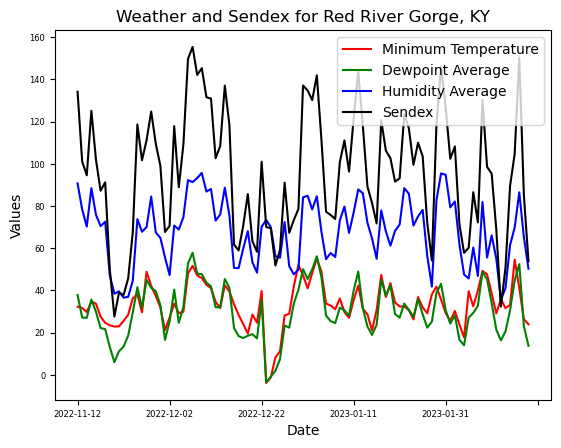

In [12]:
fig, ax = plt.subplots()
sendex_table.plot(x='Date', y='Minimum Temperature', color= 'red', kind='line', xlabel= 'Date', ylabel= 'Values', ax=ax, fontsize= 6,title='Weather and Sendex for Red River Gorge, KY')
sendex_table.plot(x='Date', y='Dewpoint Average', color= 'green', kind='line',ax=ax)
sendex_table.plot(x='Date', y='Humidity Average', color= 'blue', kind='line',ax=ax)
sendex_table.plot(x='Date', y='Sendex', color= 'black', kind='line',ax=ax)
plt.show()
